In [1]:
%matplotlib inline
from data import get_data_from_mat
from pandas import DataFrame
import scipy.misc as smp
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy
from algos import process_data_by_classification_and_set, convert_data_to_dict_of_array, LogisticRegression
seaborn.set(style='darkgrid')
seaborn.set_context('notebook')


# One-vs-All logistic regression multi-class classification

#### Getting data and setting training set size

In [2]:
training_set_lenth = 4000

original_data = get_data_from_mat('ex3data1.mat')
# initial_weights_data = get_data_from_mat('ex3weights.mat')
x_data = DataFrame(original_data['X'])
y_data = DataFrame(original_data['y'])
y_data.columns = ['y']
xy_data_df = pandas.concat([x_data, y_data], axis='columns')
data_store_dictionary = process_data_by_classification_and_set(xy_data_df, training_set_lenth)
input_data_dictionary = convert_data_to_dict_of_array(data_store_dictionary)




In [81]:
input_data_dictionary['regularized_lambda'] = 0.0
input_data_dictionary['number_of_iteration'] = 1000
input_data_dictionary['learning_rate'] = 0.5

In [82]:
logit_regression = LogisticRegression(**input_data_dictionary)
logit_regression.train()

Training accuracy is: 0.9215


In [83]:
logit_regression.training_predicted_y

array([8, 5, 5, ..., 4, 2, 8], dtype=int64)

In [84]:
input_data_dictionary['y_variables']

array([3, 5, 5, ..., 4, 2, 8], dtype=uint8)

In [85]:
logit_regression.test()

Testing accuracy is: 0.885


In [56]:
def get_row_number(class_number):
    if class_number >= 6:
        return 1
    elif class_number <= 5:
        return 0
    
def get_column_number(class_number):
    map_class = {1: 0, 6: 0, 2: 1, 7: 1, 3: 2, 8: 2, 4: 3, 9: 3, 5: 4, 10: 4}
    return map_class[class_number]

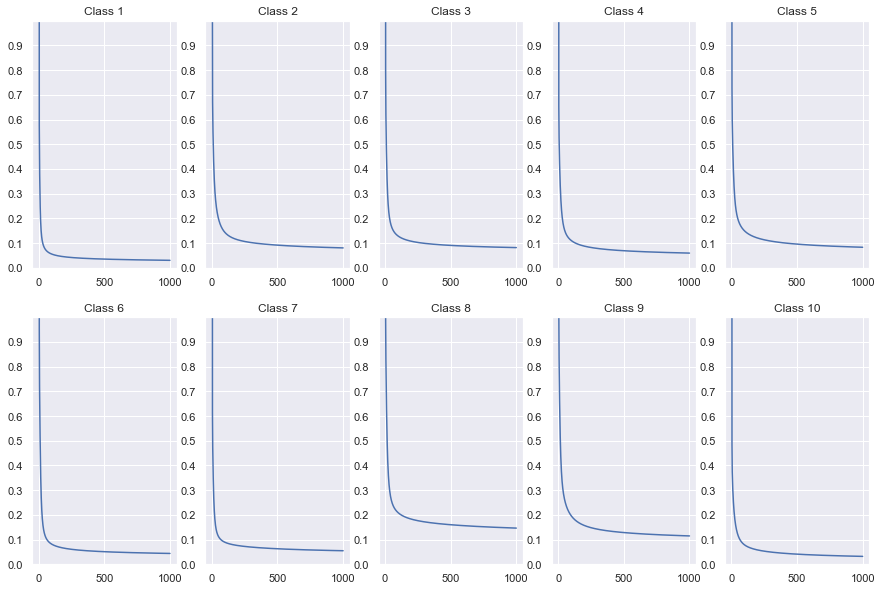

In [86]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
for class_, iteration_chart in logit_regression.iteration_cost_df_by_class.items():
    axes[get_row_number(class_), get_column_number(class_)].set_title('Class ' + str(class_))
    axes[get_row_number(class_), get_column_number(class_)].plot(iteration_chart['No_of_iteration'], iteration_chart['cost'])
    axes[get_row_number(class_), get_column_number(class_)].set_ylim([0, 1])
    axes[get_row_number(class_), get_column_number(class_)].set_yticks(numpy.arange(0, 1, step=0.1))
    